In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_cleaned.csv')
data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [3]:
data.isnull().sum()/100

Survived      0.0
Age           0.0
Fare          0.0
Pclass_1      0.0
Pclass_2      0.0
Pclass_3      0.0
Sex_female    0.0
Sex_male      0.0
SibSp_0       0.0
SibSp_1       0.0
SibSp_2       0.0
SibSp_3       0.0
SibSp_4       0.0
SibSp_5       0.0
SibSp_8       0.0
Parch_0       0.0
Parch_1       0.0
Parch_2       0.0
Parch_3       0.0
Parch_4       0.0
Parch_5       0.0
Parch_6       0.0
Embarked_C    0.0
Embarked_Q    0.0
Embarked_S    0.0
dtype: float64

In [4]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

testing for k = 3

In [8]:
clf = KNN(n_neighbors=3)

#fitting our model
clf.fit(train_x, train_y)

#predicting over test set and calculating F1
test_predict = clf.predict(test_x)
test_F1 = f1_score(test_predict, test_y)
print('F1 score of test set is: ', test_F1)
#predicting over train set and calculating F1
train_predict = clf.predict(train_x)
train_F1 = f1_score(train_predict, train_y)
print('F1 score of train set is: ', train_F1)

F1 score of test set is:  0.7080745341614907
F1 score of train set is:  0.8209255533199196


Visualising the training F1 score and testing F1 score

In [9]:
def visualize(k):
    train_F1_values = []
    test_F1_values = []
    
    for i in k:
        clf = KNN(n_neighbors=i)
        
        clf.fit(train_x, train_y)
        train_predict = clf.predict(train_x)
        train_f1 = f1_score(train_y, train_predict)
        train_F1_values.append(train_f1)
        
        test_predict = clf.predict(test_x)
        test_f1 = f1_score(test_predict, test_y)
        test_F1_values.append(test_f1)
        
    return train_F1_values, test_F1_values

In [10]:
K = range(1, 100)

In [11]:
train_f1, test_f1 = visualize(K)

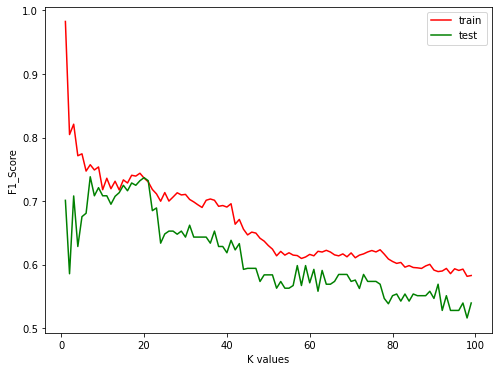

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
plt.figure(figsize = (8, 6))
plt.plot(K, train_f1, color='red', label = 'train')
plt.plot(K, test_f1, color = 'green', label = 'test')
plt.xlabel('K values')
plt.ylabel('F1_Score')
plt.legend()

We can see that for very low values of k the model is overfitting and for values aroung 20 the model is best fit while for
higher values of k it is underfitting.

But We are using the same model to predict for the test set so how can we be sure that the k value chosen is correct

Let us check what happens when we change the random state ie we change the test set. Since our model is already predicting for different values of k it has seen the data beforehand, So let us try to change that set and see if we get the same results

In [13]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 42, stratify=y)

In [14]:
def visualize(k):
    train_F1_values = []
    test_F1_values = []
    
    for i in k:
        clf = KNN(n_neighbors=i)
        
        clf.fit(train_x, train_y)
        train_predict = clf.predict(train_x)
        train_f1 = f1_score(train_y, train_predict)
        train_F1_values.append(train_f1)
        
        test_predict = clf.predict(test_x)
        test_f1 = f1_score(test_predict, test_y)
        test_F1_values.append(test_f1)
        
    return train_F1_values, test_F1_values

In [15]:
K = range(1, 100)
train_f1, test_f1 = visualize(K)

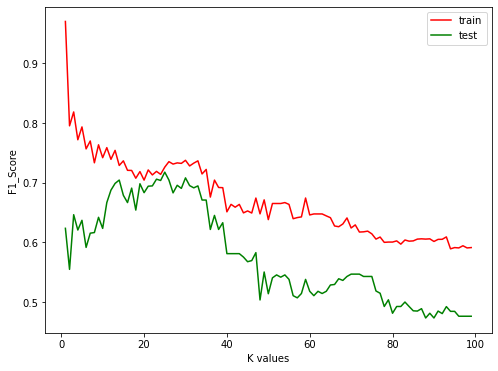

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
plt.figure(figsize = (8, 6))
plt.plot(K, train_f1, color='red', label = 'train')
plt.plot(K, test_f1, color = 'green', label = 'test')
plt.xlabel('K values')
plt.ylabel('F1_Score')
plt.legend()

This time we can see that the best fit occurs somewhere around 25 whereas earlier it was around 20

In [17]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

In [18]:
K = range(1, 100)
train_f1, test_f1 = visualize(K)

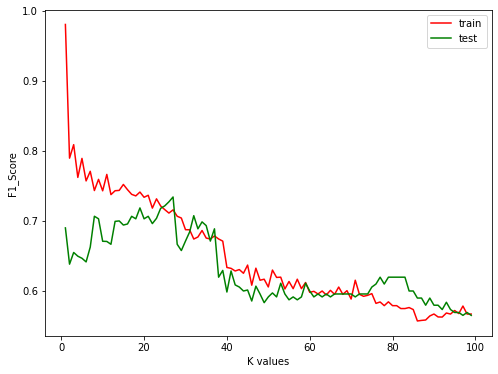

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
plt.figure(figsize = (8, 6))
plt.plot(K, train_f1, color='red', label = 'train')
plt.plot(K, test_f1, color = 'green', label = 'test')
plt.xlabel('K values')
plt.ylabel('F1_Score')
plt.legend()

This time we get completely different result with multiple vale of k satisfying the best fit

So different set of test data can alter the result.